## Missing Values Handling in Time Series Data
<b> Here we are using same 'AirPassengers.csv' Dataset, which we have usid in previous problem. Let's imagine that our dataset had some missing values between January and April 1950. Now here we are going to handle the these missing values with few simple techniques.

### importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Collection/Loading the dataset
<b> Load the dataset by using read_csv() to read the dataset and save it to the 'data' variable and take a look at the first 5 lines using the head() method.

In [2]:
# Load the dataset.
data = pd.read_csv('AirPassengers.csv')

# Display the first 5 lines using the head() method.
data.head()

,Month,Passengers
0,15-01-1949,112
1,15-02-1949,118
2,15-03-1949,132
3,15-04-1949,129
4,15-05-1949,121


<b> We need to convert them in to datetime datatype.

In [3]:
# import 'datetime' class from datetime library 
from datetime import datetime

# Convert 'object' dtype to 'datetime' for 'Month' variable
data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)

<b> Now, we will need to index Month column by using set_index() method.

In [4]:
# Set the 'Month' variable as index 
data = data.set_index('Month')

# Display the first 5 lines using the head() method.
data.head()

,Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


### Introducing some missing values and displaying those missing values with plot

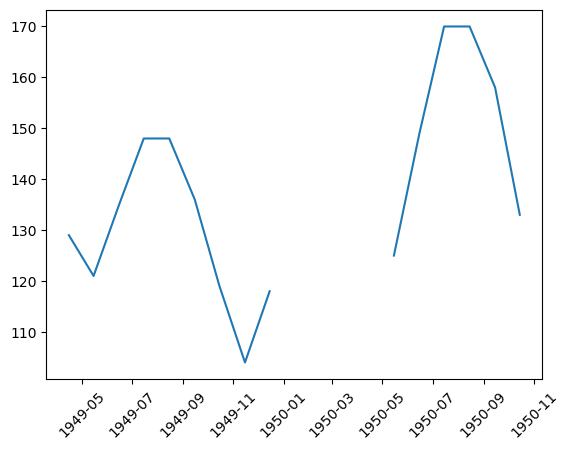

In [5]:
# Introducing some missing values
plt.figure(dpi =100)
missing_data = data.loc["15-04-1949":"15-10-1950"]
missing_data.loc["15-01-1950":"15-04-1950"] = np.nan
plt.plot(missing_data)
tick = plt.xticks(rotation=45)

### Now, let’s look at a few simple techniques to fill the missing values:

- **Forward Fill** - keeps the last "good" value.
    
    
- **Backward Fill** - keeps the next "good" value.
    
    
- **Mean Value Fill** - fills the missing values with the mean of the entire series.
    
    
- **Interpolation** - fills the missing values by interpolating between the previous and the next value.
    

<b> Now we will use Forward Fill, Backward Fill and Mean Value Fill techniques with pandas.

In [8]:
# copy the 'missing_data' with another object as 'f_missing_data'
f_missing_data = missing_data.copy()

#Forward Fill
f_missing_data["ffill"] = f_missing_data["Passengers"].ffill()

#Backward fill
f_missing_data["bfill"] = f_missing_data["Passengers"].bfill()

# Mean Value Fill
f_missing_data["mean"] = f_missing_data["Passengers"].fillna(f_missing_data["Passengers"].mean())

<b> In the above, we have filled the missing values with 3 different techniques, i.e. Forward Fill, Backward Fill and Mean Value Fill techniques. Now we are displaying the these result on plot.

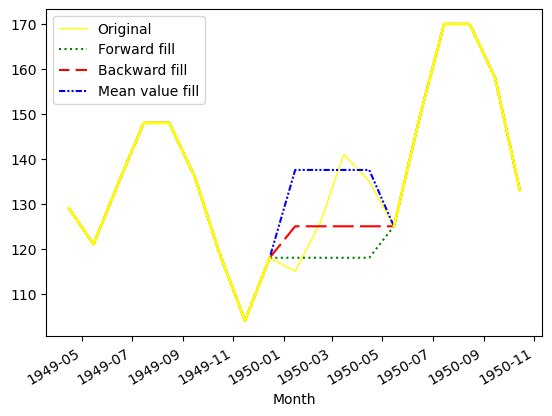

In [10]:
# Set dpi=100
plt.figure(dpi=100)         

# Original plot
data.loc["15-04-1949":"15-10-1950"]["Passengers"].plot(color ="yellow", linestyle='solid',lw=1) 

# Forward fill plot
f_missing_data["ffill"].plot( color='green', linestyle='dotted')  

# Backward fill plot
f_missing_data["bfill"].plot( color='red', linestyle=(5, (10, 3)))  

# Mean value fill plot
f_missing_data["mean"].plot( color='blue', linestyle=(0, (3, 1, 1, 1, 1, 1)))

# Actual original plot
f_missing_data["Passengers"].plot(color ="yellow", linestyle='solid',lw=2)  

# Legend 
plt.legend(["Original","Forward fill", "Backward fill", "Mean value fill"]) 

# Display the plots
plt.show()                                                                                          

### Now we will use interpolation techniques with pandas.Series.interpolate()

- **Linear interpolation** - is drawing a line between the last and the next "good" values.
    
    
- **Pad interpolation** - is the same as forward fill.
    
    
- **Nearest interpolation** - is filling the missing values by taking the closest observed value (is like a combination between forward and backward fill).
    

In [11]:
# Linear interpolation
f_missing_data["linear interpolation"] = f_missing_data["Passengers"].interpolate(method = "linear")

# Pad interpolation
f_missing_data["pad interpolation"] = f_missing_data["Passengers"].interpolate(method = "pad")

# Nearest interpolation
f_missing_data["nearest interpolation"] = f_missing_data["Passengers"].interpolate(method = "nearest")

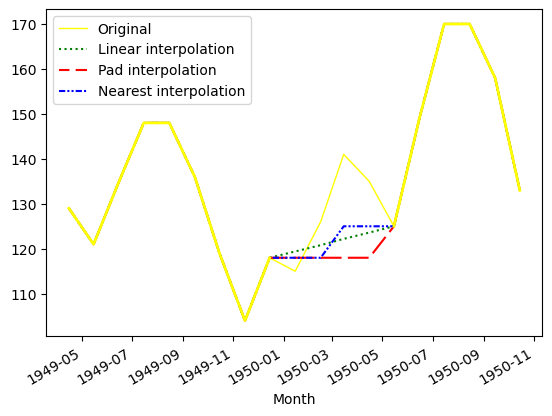

In [12]:
# Set dpi=100
plt.figure(dpi=100)      

# Original plot
data.loc["15-04-1949":"15-10-1950"]["Passengers"].plot(color ="yellow", linestyle='solid',lw=1)  

# linear interpolation plot
f_missing_data["linear interpolation"].plot( color='green', linestyle='dotted')  

# pad interpolation plot
f_missing_data["pad interpolation"].plot( color='red', linestyle=(5, (10, 3)))   

# nearest interpolation plot
f_missing_data["nearest interpolation"].plot( color='blue', linestyle=(0, (3, 1, 1, 1, 1, 1))) 

# Actual Original plot
f_missing_data["Passengers"].plot(color ="yellow", linestyle='solid',lw=2)    

# Legend
plt.legend(["Original","Linear interpolation", "Pad interpolation", "Nearest interpolation"]) 

# Display the plots
plt.show()                                                                                     

### There are a few non-linear interpolation techniques as well. They are as:

- **Spline interpolation** - This model uses cubic spline interpolation to fill in gaps in a time series.
- **Polynomial interpolation** - polynomial interpolation fills missing values with the lowest possible degree that passes through available data points. 

In [13]:
# Spline interpolation

# Spline interpolation order 2
f_missing_data["spline interpolation 2"] = f_missing_data["Passengers"].interpolate(method = "spline", order = 2)

# Spline interpolation order 3
f_missing_data["spline interpolation 3"] = f_missing_data["Passengers"].interpolate(method = "spline", order = 3)

# Spline interpolation order 4
f_missing_data["spline interpolation 4"] = f_missing_data["Passengers"].interpolate(method = "spline", order = 4)

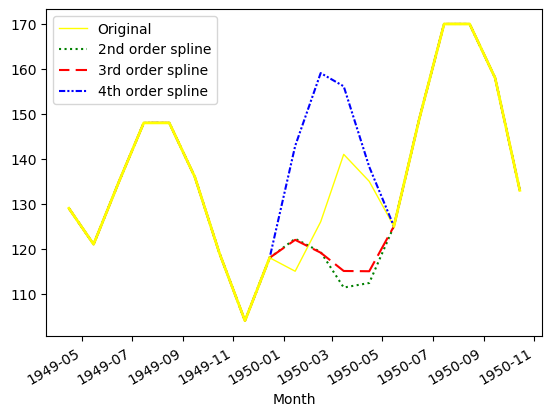

In [14]:
# Set dpi=100
plt.figure(dpi=100)   

# Original plot with missing values
data.loc["15-04-1949":"15-10-1950"]["Passengers"].plot(color ="yellow", linestyle='solid',lw=1)  

# spline interpolation 2 plot
f_missing_data["spline interpolation 2"].plot( color='green', linestyle='dotted')

# spline interpolation 3 plot
f_missing_data["spline interpolation 3"].plot( color='red', linestyle=(5, (10, 3)))

# spline interpolation 4 plot
f_missing_data["spline interpolation 4"].plot( color='blue', linestyle=(0, (3, 1, 1, 1, 1, 1)))

# Actual Original plot 
f_missing_data["Passengers"].plot(color ="yellow", linestyle='solid',lw=2)

# Legends
plt.legend(["Original","2nd order spline", "3rd order spline", "4th order spline"])

# Display the plots
plt.show()

In [15]:
# Polynomial interpolation

# Polynomial interpolation order 2
f_missing_data["polynomial interpolation 2"] = f_missing_data["Passengers"].interpolate(method = "polynomial", order = 2)

# polynomial interpolation order 3
f_missing_data["polynomial interpolation 3"] = f_missing_data["Passengers"].interpolate(method = "polynomial", order = 3)

# polynomial interpolation order 5
f_missing_data["polynomial interpolation 5"] = f_missing_data["Passengers"].interpolate(method = "polynomial", order = 5)


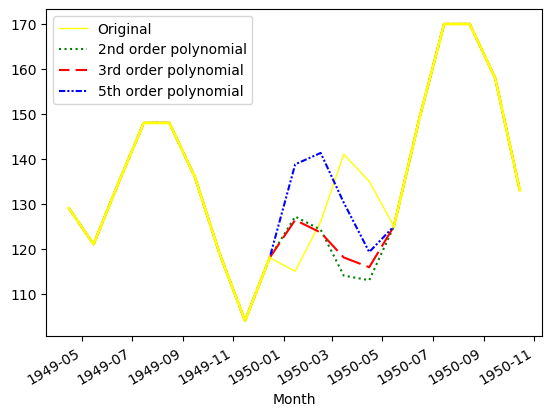

In [16]:
# Set dpi=100
plt.figure(dpi=100)

# Original plot with missing values
data.loc["15-04-1949":"15-10-1950"]["Passengers"].plot(color ="yellow", linestyle='solid',lw=1)

# polynomial interpolation 2 plot
f_missing_data["polynomial interpolation 2"].plot( color='green', linestyle='dotted')

# polynomial interpolation 3 plot
f_missing_data["polynomial interpolation 3"].plot( color='red', linestyle=(5, (10, 3)))

# polynomial interpolation 5 plot
f_missing_data["polynomial interpolation 5"].plot( color='blue', linestyle=(0, (3, 1, 1, 1, 1, 1)))

# Actual Original plot 
f_missing_data["Passengers"].plot(color ="yellow", linestyle='solid',lw=2)

# Legend
plt.legend(["Original","2nd order polynomial", "3rd order polynomial", "5th order polynomial"])

# Display the plots
plt.show()